In [1]:
import pandas as pd

In [8]:
data=pd.read_csv('https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv')

In [9]:
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [10]:
pip install scikit-learn

In [11]:
X=data[['CO']] #VARIABLE INDEPENDIENTE

In [14]:
y=data['PM10']#VARIABLE DEPENDIENTE

In [66]:
split_index=int(len(data)*0.8)

In [16]:
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [17]:
from sklearn.linear_model import LinearRegression
#paqueteria para hacer la regresión lineal

In [20]:
model=LinearRegression()



In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred=model.predict(X_test)

In [40]:
coeficientes=pd.DataFrame({'Variable':X.columns, 'Coeficientes':model.coef_})

In [41]:
print(coeficientes)

  Variable  Coeficientes
0       CO     40.900744


In [42]:
print(f'Intercepto: {model.intercept_}')

Intercepto: 21.54999623599743


In [43]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error



In [44]:
r2=r2_score(y_test, y_pred)

In [45]:
r2

0.3201071820391479

In [46]:
rmse=mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
rmse

11.77666344681527

In [48]:
mae=mean_absolute_error(y_test, y_pred)

In [49]:
mae

9.526919646927563

In [50]:
y_pred

array([33.64521454, 34.1905546 , 31.7274982 , 35.37578861, 38.72135267,
       39.72317048, 40.34860727, 41.8092239 , 42.85184098, 31.54657867,
       30.51187083, 31.39632839, 34.68279275, 35.57109354, 36.44044443,
       34.83283708, 35.51691852, 42.28659197, 39.60547444, 40.10283009,
       39.29888123, 36.4510136 , 29.69172549, 29.7869987 , 37.57930065,
       38.51774549, 38.70968206, 31.27389388, 32.63183766, 35.95331245,
       34.58132883, 44.56386539, 40.48689552, 37.27430962, 43.11548469,
       42.83995332, 40.43531728, 39.26081737, 38.05150737, 34.83123228,
       41.32073918, 37.72915013, 36.6839953 , 34.71652365, 32.14328885,
       36.01231538, 36.58387118, 43.34194827, 39.12419691, 33.69235778,
       29.43288421, 31.64478431, 31.5504123 , 41.74960242, 41.86040631,
       39.11842757, 31.4335565 , 33.63376972, 35.10829733, 31.85498848,
       34.00798198, 41.64942566, 43.18946079, 34.22074656, 43.46407829,
       40.20152954, 37.37313061, 42.17839159, 39.65792958, 38.04

In [51]:
import matplotlib.pyplot as plt

In [52]:
residuos=y_test-y_pred

Text(0, 0.5, 'Frecuencia')

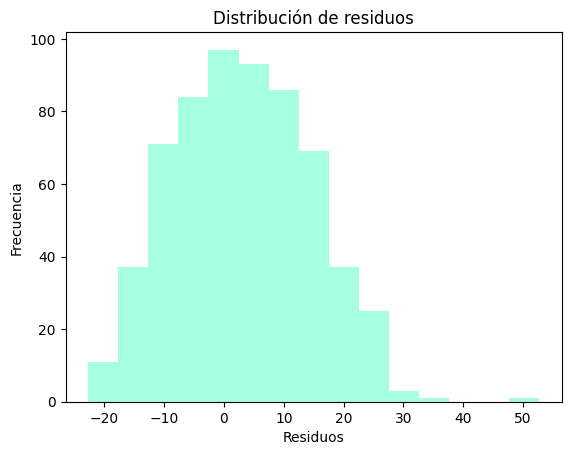

In [58]:
plt.hist(residuos, bins=15, color='aquamarine', alpha=0.7)
plt.title('Distribución de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

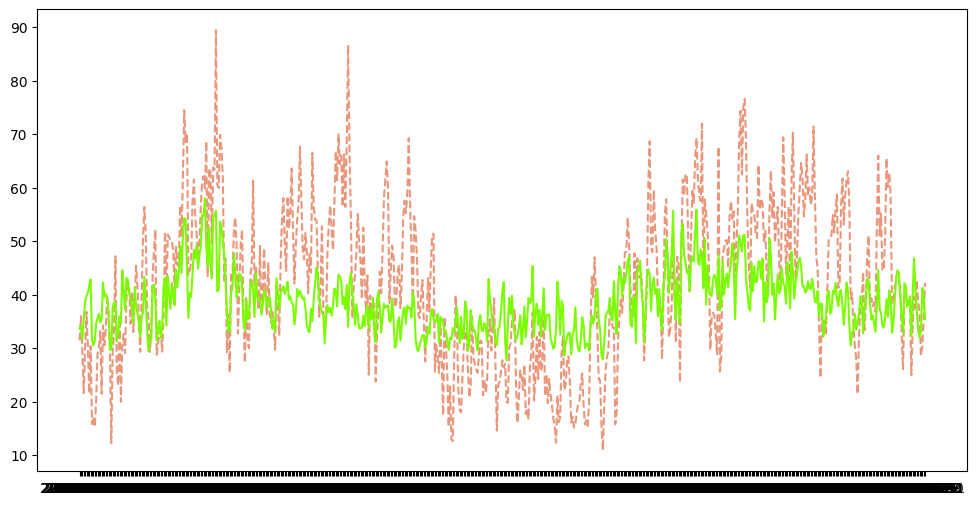

In [63]:
plt.figure(figsize=(12,6))
plt. plot(data.iloc[split_index:]['fecha'], y_test, linestyle='--', color='darksalmon')
plt. plot(data.iloc[split_index:]['fecha'], y_pred,  linestyle='-', color='lawngreen')

Lo que sehizo anterior tambien se puede hacer tomando como variables independientes a CO, NOX, PM25 y SO2 para predecir PM10

In [89]:
X=data[['CO', 'NOX', 'PM25', 'SO2']] #VARIABLES INDEPENDIENTES

In [90]:
y=data['PM10']#VARIABLE DEPENDIENTE

In [91]:
split_index=int(len(data)*0.8)

In [92]:
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [93]:
from sklearn.linear_model import LinearRegression
#paqueteria para hacer la regresión lineal

In [94]:
model=LinearRegression()

In [95]:
model.fit(X_train, y_train)

LinearRegression()

In [96]:
y_pred=model.predict(X_test)

In [97]:
coeficientes=pd.DataFrame({'Variable':X.columns, 'Coeficientes':model.coef_})

In [98]:
print(coeficientes)

  Variable  Coeficientes
0       CO    -21.240472
1      NOX      0.530047
2     PM25      1.341258
3      SO2      0.122226


In [99]:
print(f'Intercepto: {model.intercept_}')

Intercepto: 2.542471488012616


In [100]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error

In [101]:
r2=r2_score(y_test, y_pred)

In [102]:
r2

0.7494314866330515

In [103]:
rmse=mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [104]:
rmse

7.149329038511094

In [105]:
mae=mean_absolute_error(y_test, y_pred)

In [106]:
mae

5.463133609444374

In [107]:
y_pred

array([31.38002881, 37.86450851, 32.04174414, 26.0631386 , 33.5333308 ,
       42.05139907, 40.14043928, 29.99883337, 36.74335268, 21.76294946,
       19.3049341 , 17.56171307, 23.44982476, 29.76943116, 29.36952081,
       34.52061101, 20.06627078, 34.39087261, 33.08816623, 34.58422105,
       40.05360016, 35.45067444, 23.9899229 , 13.97945307, 30.74979421,
       35.30842121, 49.41866435, 23.17090231, 22.36419371, 39.87602679,
       22.72771426, 35.22740105, 33.26176002, 27.6873052 , 46.75531003,
       53.96682474, 47.14756127, 38.33097827, 40.52208719, 35.34494686,
       46.00862321, 47.72503412, 43.38116545, 39.30906491, 30.53299751,
       41.29068002, 52.48091463, 52.25544764, 42.34265178, 34.80613239,
       31.28221483, 30.38697676, 31.17733714, 44.00940911, 46.81459584,
       45.92792275, 26.58188832, 32.50082829, 34.72659384, 32.48913447,
       26.32497217, 38.62973209, 51.37690293, 37.44124484, 52.56188205,
       49.66050962, 47.99784311, 48.7994119 , 42.63969231, 36.32

In [108]:
import matplotlib.pyplot as plt

In [109]:
residuos=y_test-y_pred

Text(0, 0.5, 'Frecuencia')

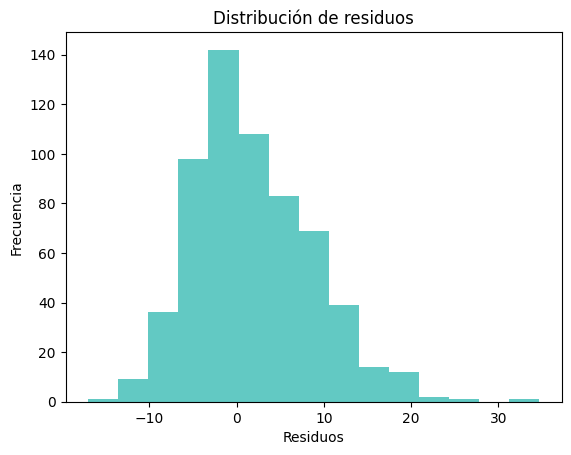

In [110]:
plt.hist(residuos, bins=15, color='lightseagreen', alpha=0.7)
plt.title('Distribución de residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

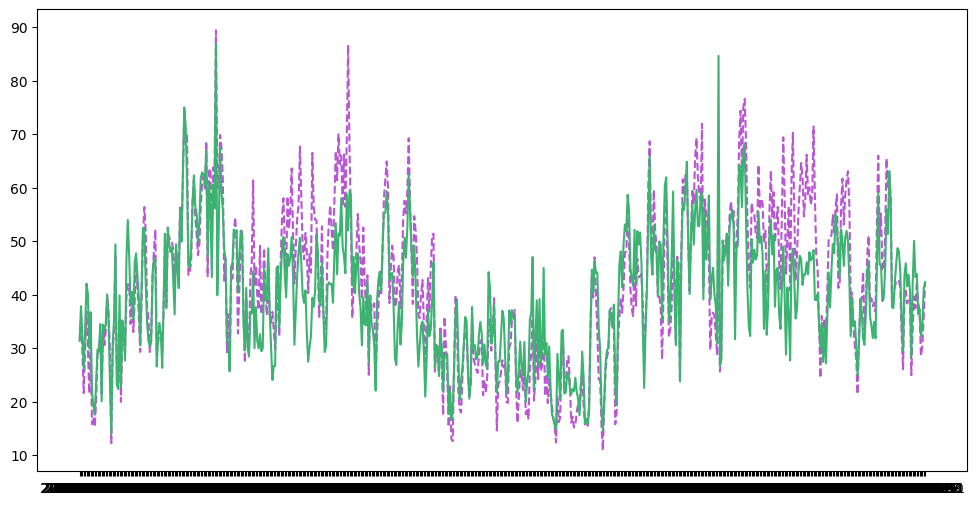

In [111]:

plt.figure(figsize=(12,6))
plt. plot(data.iloc[split_index:]['fecha'], y_test, linestyle='--', color='mediumorchid')
plt. plot(data.iloc[split_index:]['fecha'], y_pred,  linestyle='-', color='mediumseagreen')

***Random Forest***

Def. Modelo de conjunto basado en múltiples árboles de decisión.

*Usa Bootstrap Sampling y subconjuntos aleatorios de características.
*En regresión: Promedia las predicciones de todos los árboles.
*Reduce el sobreajuste y es robusto a datos ruidosos.

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestRegressor



Arboles

In [117]:
data=data.sort_values(by='fecha')
split_index=int(len(data)*0.8)
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

In [118]:
rf_model=RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [119]:
#Ahora coomo se realizan las predicciones
y_pred=rf_model.predict(X_test)

In [114]:
y_pred

array([31.38002881, 37.86450851, 32.04174414, 26.0631386 , 33.5333308 ,
       42.05139907, 40.14043928, 29.99883337, 36.74335268, 21.76294946,
       19.3049341 , 17.56171307, 23.44982476, 29.76943116, 29.36952081,
       34.52061101, 20.06627078, 34.39087261, 33.08816623, 34.58422105,
       40.05360016, 35.45067444, 23.9899229 , 13.97945307, 30.74979421,
       35.30842121, 49.41866435, 23.17090231, 22.36419371, 39.87602679,
       22.72771426, 35.22740105, 33.26176002, 27.6873052 , 46.75531003,
       53.96682474, 47.14756127, 38.33097827, 40.52208719, 35.34494686,
       46.00862321, 47.72503412, 43.38116545, 39.30906491, 30.53299751,
       41.29068002, 52.48091463, 52.25544764, 42.34265178, 34.80613239,
       31.28221483, 30.38697676, 31.17733714, 44.00940911, 46.81459584,
       45.92792275, 26.58188832, 32.50082829, 34.72659384, 32.48913447,
       26.32497217, 38.62973209, 51.37690293, 37.44124484, 52.56188205,
       49.66050962, 47.99784311, 48.7994119 , 42.63969231, 36.32

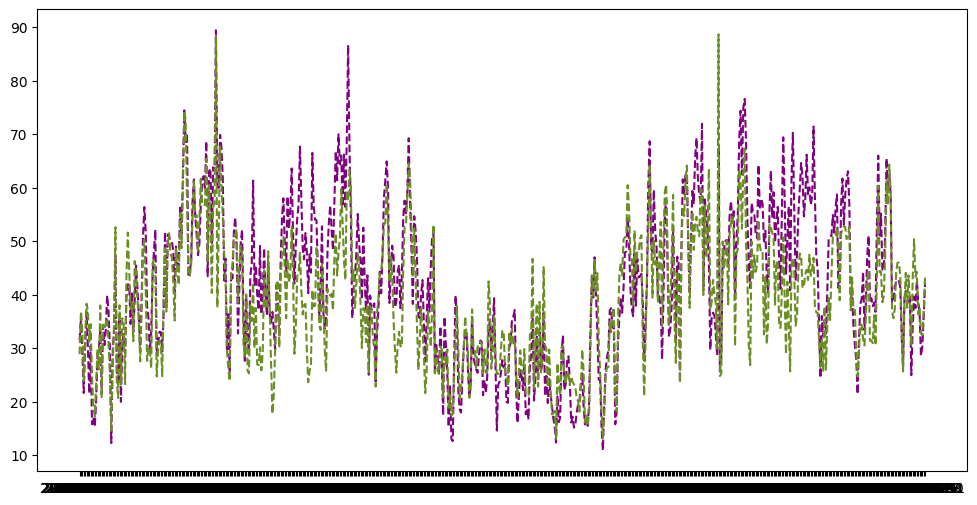

In [120]:
#Hay que encontrar las metricas
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'],y_test, linestyle='--', color='purple')
plt.plot(data.iloc[split_index:]['fecha'],y_pred, linestyle='--', color='olivedrab')